In [1]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#imports
from __future__ import division
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
pwd

'/Users/fariamardhani/Berkeley/W266/W266-Final-Project/W266-Final-Project/EDA'

In [77]:
descr = pd.read_csv('../full_descr.txt', sep="|")
descr.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name,match
0,970000005,19810105,201,34,97105301.0,R,97,S,IL,W,63.0,0.0,0.0,0.0,Mr. PERCY,"PERCY, CHARLES",exact
1,970000006,19810105,202,34,97105071.0,D,97,S,KY,W,56.0,0.0,0.0,0.0,Mr. HUDDLESTON,"HUDDLESTON, WALTER",exact
2,970000007,19810105,201,34,97106761.0,D,97,S,WA,W,70.0,0.0,0.0,0.0,Mr. JAcKSON,"JACKSON, HENRY",exact
3,970000008,19810105,201,34,97106981.0,R,97,S,VT,W,69.0,0.0,0.0,0.0,Mr. STAFFORD,"STAFFORD, ROBERT",exact
4,970000010,19810105,49,9,97104811.0,R,97,S,TN,W,57.0,0.0,0.0,0.0,Mr. BAKER,"BAKER, HOWARD",exact


In [78]:
descr_unique = descr.drop_duplicates(subset='speakerid', keep='first', inplace=False)
descr_unique.shape

(9845, 17)

In [80]:
col_names = ['speakerid', 'Congress', 'Full Name', 'Chamber', 'State', 'Female', 'Party', 'Speech_Count']
speakermap = pd.read_csv('../data/QA/full_speakermap.txt', sep="\t", 
                         names = col_names)
speakermap['Female'] = speakermap.Female.replace('M', 0)
speakermap['Female'] = speakermap.Female.replace('F', 1)
speakermap.head()

,speakerid,Congress,Full Name,Chamber,State,Female,Party,Speech_Count
0,97105301,97,"PERCY, CHARLES",S,IL,0,R,2050
1,97105071,97,"HUDDLESTON, WALTER",S,KY,0,D,563
2,97106761,97,"JACKSON, HENRY",S,WA,0,D,560
3,97106981,97,"STAFFORD, ROBERT",S,VT,0,R,497
4,97104811,97,"BAKER, HOWARD",S,TN,0,R,15456


In [81]:
speakermap.shape

(9845, 8)

In [5]:
descr.shape

(2914464, 17)

In [84]:
nonwhite = (descr['NonWhite'].sum()/descr['NonWhite'].count())*100
nonwhite

8.735843022936637

In [85]:
female = (descr['Female'].sum()/descr['Female'].count())*100
female

7.947396159293785

In [86]:
young = (descr['Age_lt_med'].sum()/descr['Age_lt_med'].count())*100
young

35.14982514795174

## Speeches, Word Count, Char Count by Characteristic (Ratio)

### By Chamber

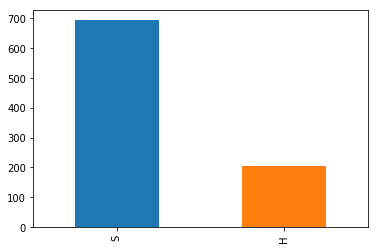

In [102]:
# Speech frequency by Chamber
x = descr.Chamber.value_counts()/speakermap.Chamber.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()

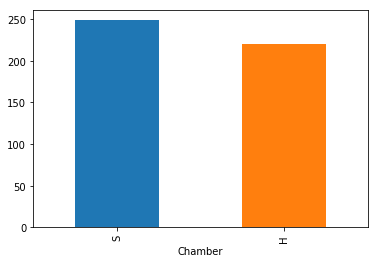

In [126]:
# Average word count per speech by Chamber
avg_word_count = descr.groupby(['Chamber']).sum()['word_count']/descr.Chamber.value_counts()
y = avg_word_count.sort_values(ascending=False)
y.plot.bar()

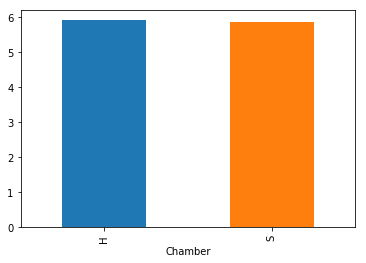

In [127]:
# Average word length per speech by Chamber
x = descr.groupby(['Chamber']).sum()['char_count']/descr.Chamber.value_counts()/avg_word_count
y = x.sort_values(ascending=False)
y.plot.bar()

### By Party

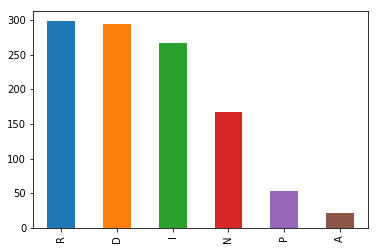

In [115]:
# Speech frequency by Party
x = descr.Party.value_counts()/speakermap.Party.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()

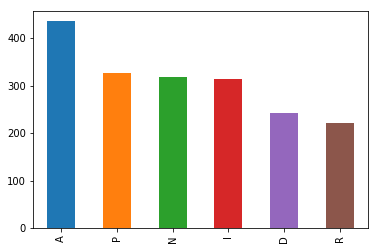

In [128]:
# Average word count per speech by Party
avg_word_count = descr.groupby(['Party']).sum()['word_count']/descr.Party.value_counts()
y = avg_word_count.sort_values(ascending=False)
y.plot.bar()

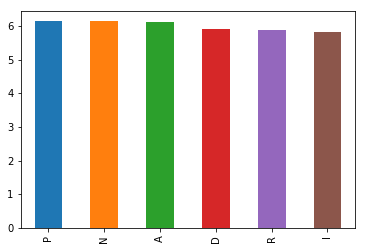

In [129]:
# Average word length per speech by Party
x = descr.groupby(['Party']).sum()['char_count']/descr.Party.value_counts()/avg_word_count
y = x.sort_values(ascending=False)
y.plot.bar()

### By Gender

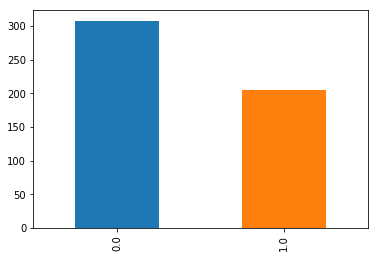

In [119]:
# Speech frequency by Gender
x = descr.Female.value_counts()/speakermap.Female.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()

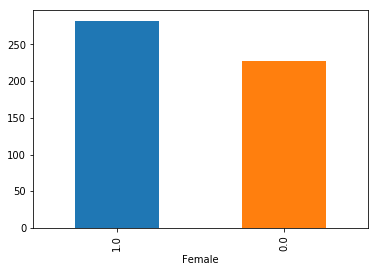

In [130]:
# Average word count per speech by Gender
avg_word_count = descr.groupby(['Female']).sum()['word_count']/descr.Female.value_counts()
y = avg_word_count.sort_values(ascending=False)
y.plot.bar()

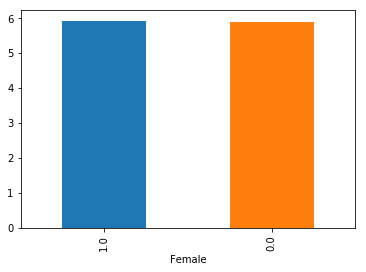

In [131]:
# Average word length per speech by Gender
x = descr.groupby(['Female']).sum()['char_count']/descr.Female.value_counts()/avg_word_count
y = x.sort_values(ascending=False)
y.plot.bar()

### By State

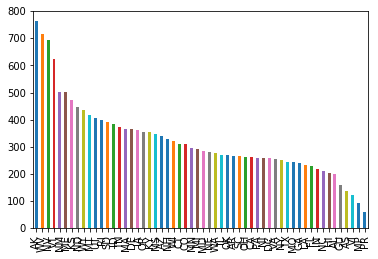

In [122]:
# Speech frequency by State
x = descr.State.value_counts()/speakermap.State.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()

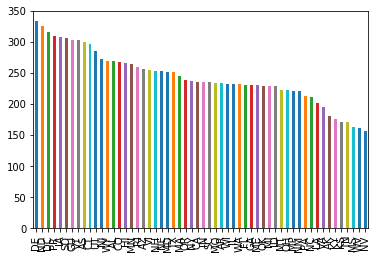

In [132]:
# Average word count per speech by State
avg_word_count = descr.groupby(['State']).sum()['word_count']/descr.State.value_counts()
y = avg_word_count.sort_values(ascending=False)
y.plot.bar()

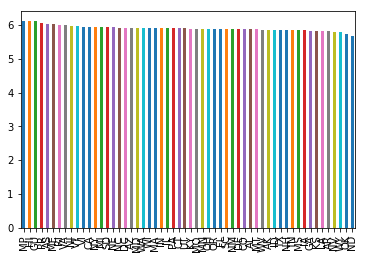

In [133]:
# Average word length per speech by State
x = descr.groupby(['State']).sum()['char_count']/descr.State.value_counts()/avg_word_count
y = x.sort_values(ascending=False)
y.plot.bar()

### Word count distribution by congress

In [10]:
descr.word_count.min(), np.percentile(descr.word_count, 10), descr.word_count.mean(), descr.word_count.median(), descr.word_count.max(), np.percentile(descr.word_count, 99)

(1, 7.0, 232.45610891059215, 59.0, 22613, 2002.0)

In [11]:
word_count = np.clip(descr.word_count, 0, np.percentile(descr.word_count, 99))

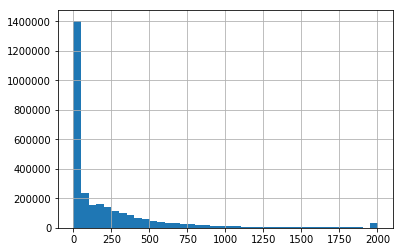

In [12]:
word_count.hist(bins=40)

In [13]:
congresses = pd.DataFrame()
congresses['percentile'] = list(range(0,101, 10))
for c in range(97,115):
    temp = descr[descr.Congress==c]
    pct = [np.percentile(temp.word_count, p) for p in range(0,101, 10)]
    congresses[c] = pct

In [14]:
congresses_t = congresses.T[1:]
congresses_t.columns = congresses.percentile
congresses_t

percentile,0,10,20,30,40,50,60,70,80,90,100
97,1.0,6.0,9.0,14.0,21.0,36.0,68.0,142.0,260.0,495.0,11962.0
98,1.0,6.0,9.0,15.0,21.0,38.0,76.0,155.0,277.0,511.0,11882.0
99,1.0,6.0,10.0,15.0,22.0,41.0,83.0,169.0,296.0,536.0,15777.0
100,1.0,7.0,11.0,15.0,25.0,45.0,94.0,191.0,322.0,565.0,12766.0
101,1.0,7.0,12.0,17.0,28.0,52.0,122.0,222.0,357.0,611.0,10068.0
102,1.0,7.0,12.0,18.0,29.0,59.0,139.0,237.0,374.0,635.0,17309.0
103,1.0,7.0,12.0,17.0,29.0,55.0,125.0,217.0,352.0,617.3,10027.0
104,1.0,7.0,11.0,16.0,27.0,51.0,112.0,202.0,337.0,606.0,12555.0
105,1.0,7.0,12.0,18.0,31.0,63.0,147.0,246.0,390.0,662.0,14321.0
106,1.0,8.0,12.0,19.0,33.0,68.0,157.0,257.0,399.0,666.0,13325.0


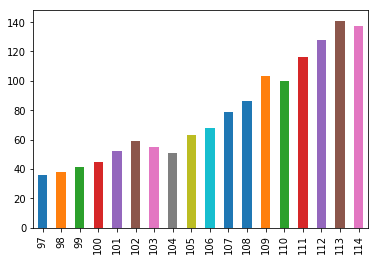

In [15]:
# median word count by congress
_ = congresses_t[50].plot.bar()

### Word count by target variables

In [16]:
descr[['NonWhite', 'word_count']].groupby(['NonWhite']).sum()

,word_count
NonWhite,
0.0,613205989
1.0,64278972


In [17]:
descr[['Female', 'word_count']].groupby(['Female']).sum()

,word_count
Female,
0.0,510725189
1.0,54187085


In [17]:
descr[['Age_lt_med', 'word_count']].groupby(['Age_lt_med']).sum()

,word_count
Age_lt_med,
0.0,424131334
1.0,253353627


### Speeches longer than median word count

In [18]:
# get median by congress
med = descr[['word_count','Congress']].groupby(['Congress']).median().reset_index()
med.columns = ['Congress', 'word_count_med']
descr = descr.merge(med, how='left', on='Congress')
descr['word_count_med'].describe()

count    2.914464e+06
mean     6.876449e+01
std      3.097315e+01
min      3.600000e+01
25%      4.500000e+01
50%      5.900000e+01
75%      8.600000e+01
max      1.410000e+02
Name: word_count_med, dtype: float64

In [20]:
descr['word_count_ge_med'] = descr.apply(lambda row: 0 if row['word_count'] < row['word_count_med'] else 1, axis=1)
descr['word_count_ge_med'].mean()

0.500925384564709

In [21]:
descr[(descr.word_count_ge_med==1) & (descr.NonWhite==1)]['speakerid'].nunique(), descr[(descr.word_count_ge_med==1) & (descr.NonWhite==0)]['speakerid'].nunique()

(1245, 8595)

In [22]:
descr[(descr.word_count_ge_med==1) & (descr.Female==1)]['speakerid'].nunique(), descr[(descr.word_count_ge_med==1) & (descr.Female==0)]['speakerid'].nunique()

(1127, 8713)

In [23]:
descr[(descr.word_count_ge_med==1) & (descr.Age_lt_med==1)]['speakerid'].nunique(), descr[(descr.word_count_ge_med==1) & (descr.Age_lt_med==0)]['speakerid'].nunique()

(4746, 5094)

In [24]:
descr[descr.word_count_ge_med==1].NonWhite.value_counts()

0.0    1317275
1.0    142654 
Name: NonWhite, dtype: int64

In [25]:
descr[descr.word_count_ge_med==1].Female.value_counts()

0.0    1324867
1.0    135062 
Name: Female, dtype: int64

In [26]:
descr[descr.word_count_ge_med==1].Age_lt_med.value_counts()

0.0    887985
1.0    571944
Name: Age_lt_med, dtype: int64

In [27]:
descr[descr.word_count_ge_med==1][['NonWhite', 'word_count']].groupby(['NonWhite']).sum()

,word_count
NonWhite,
0.0,586207244
1.0,61676676


In [28]:
descr[descr.word_count_ge_med==1][['Female', 'word_count']].groupby(['Female']).sum()

,word_count
Female,
0.0,584884324
1.0,62999596


In [29]:
descr[descr.word_count_ge_med==1][['Age_lt_med', 'word_count']].groupby(['Age_lt_med']).sum()

,word_count
Age_lt_med,
0.0,403783543
1.0,244100377


### Fuzzy match on last name, gender, congress

In [31]:
descr.shape

(2914464, 19)

In [32]:
descr[descr.NonWhite==1]['speakerid'].nunique(), descr[descr.NonWhite==0]['speakerid'].nunique()

(1249, 8596)

In [33]:
descr[descr.Female==1]['speakerid'].nunique(), descr[descr.Female==0]['speakerid'].nunique()

(1129, 8716)

In [34]:
descr[descr.Age_lt_med==1]['speakerid'].nunique(), descr[descr.Age_lt_med==0]['speakerid'].nunique()

(4750, 5095)

In [35]:
descr.NonWhite.value_counts()

0.0    2659861
1.0    254603 
Name: NonWhite, dtype: int64

In [36]:
descr.Female.value_counts()

0.0    2682840
1.0    231624 
Name: Female, dtype: int64

In [37]:
descr.Age_lt_med.value_counts()

0.0    1890035
1.0    1024429
Name: Age_lt_med, dtype: int64

In [38]:
descr[['NonWhite', 'word_count']].groupby(['NonWhite']).sum()

,word_count
NonWhite,
0.0,613205989
1.0,64278972


In [39]:
descr[['Female', 'word_count']].groupby(['Female']).sum()

,word_count
Female,
0.0,612118326
1.0,65366635


In [40]:
descr[['Age_lt_med', 'word_count']].groupby(['Age_lt_med']).sum()

,word_count
Age_lt_med,
0.0,424131334
1.0,253353627
